<a href="https://colab.research.google.com/github/johnjoel2001/ML_Interpretability/blob/main/ML_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **XAI - AIPI 590**

**Assignment 02 - Churn Prediction with Interpretability**


**Intrepretable ML**

**John Rohit Ernest Jayaraj**

In [62]:
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "XAI-_Assignments" # Change to your repo name
git_path = 'https://github.com/johnjoel2001/XAI-_Assignments.git' #Change to your path
!git clone "{git_path}"

rm: cannot remove './sample_data': No such file or directory
Cloning into 'XAI-_Assignments'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.


In [56]:
! pip install pygam --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 19.7 MB/s eta 0:00:00


# **Importing Necessary Libraries**

In [57]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score, f1_score

from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import Log
from statsmodels.genmod import families

from pygam import LogisticGAM, GammaGAM, s


# **Loading the data**

In [2]:
# Loading the data

data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# **Exploratory Data Analysis**

In [3]:
# Checking first few rows of the data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Checking the shape of data
data.shape

(7043, 21)

In [5]:
# Checking the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Checking the missing values in the data

data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Inferences**

1.   There are **7043** rows and **21** columns in the data.
2.   There are no missing values in the data.
3.   The data has a combination of both numeric and categorical columns.
4. Our target variable is `churn`.
5.   The feature  `MonthlyCharges` should not be an object rather numeric. We should fix it.




In [7]:
# So let us convert MonthlyCharges from object to numeric

data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [8]:
# Checking the structure of data after conversion

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Checking whether there are any missing values after conversion

data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Inferences**

1.  We observed that there are 11 rows with values in `TotalCharges` after converting it from an object to a numeric data type.

2.  We will remove those 11 rows which which have missing values.



In [10]:
# Removing  missing values

data.dropna(inplace=True)

In [11]:
# Checking for missing values after removal. Doing cross-verification
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
# Using Label Encoder to encode binary categorical variables

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
label_encoder=LabelEncoder()

for col in binary_cols:
  data[col]=label_encoder.fit_transform(data[col])



In [13]:
# Using One-Hot Encoding to encode categorical variables (which have more than two categories)
data=pd.get_dummies(data,columns=['InternetService','MultipleLines','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','DeviceProtection'],drop_first=True)


In [14]:
data.head() # Checkinjg first few rows of the data after encoding

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No internet service,DeviceProtection_Yes
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,True,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,True,False,False,False,True,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,True,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,False,False,True,False,False,False,False,False,True
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,True,False,False,False


**Inferences**

1.   After encoding, we will drop `customerID` which is an irrevelant feature.
2.   We will replace the columns which are boolean into 0s and 1s to make it easier for the model to read.





In [15]:
# Dropping 'customerID' column
data.drop(columns=['customerID'],inplace=True)

# Replacing boolean values into 0s and 1s
data = data.replace({True: 1, False: 0})

<ipython-input-15-7c729a6ea327>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [16]:
# Checking the first few rows of the data whether the aforementioned operations have been done successfully
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No internet service,DeviceProtection_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,1,0,0,0,1,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,1,0,0,0


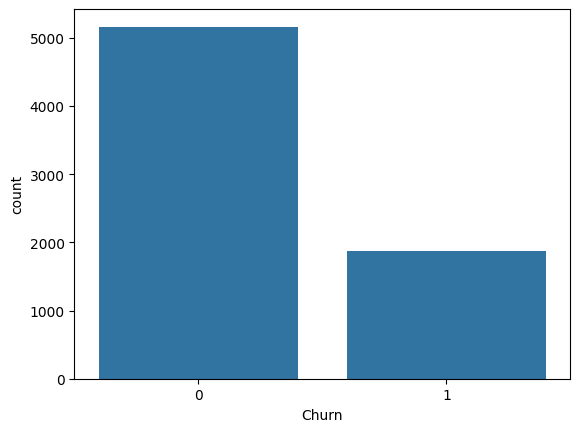

In [17]:
# Plotting the distribution of target variable ('Churn')

sns.countplot(x='Churn',data=data)
plt.show()

**Inference**

1) We can see a quite significant class imbalance.

2) The data contains approximately three times more data for customers who were retained compared to those who churned.

# **Assumptions for Linear Regression**

1. **Linearity:** The underlying relationship between X (features) and y (target) is linear.
2. **No multicollinarity:** The features should not be highly correlated with one another.
3. **Independence:** The residual (error) terms are independent of one another.
4. **Homoscedasticity:** The residuals have a constant variance.
5. N**ormality**: The residuals are n ormally distributed, or approximately so.



## **Checking the Assumption of Linearity**

<Axes: xlabel='tenure', ylabel='Churn'>

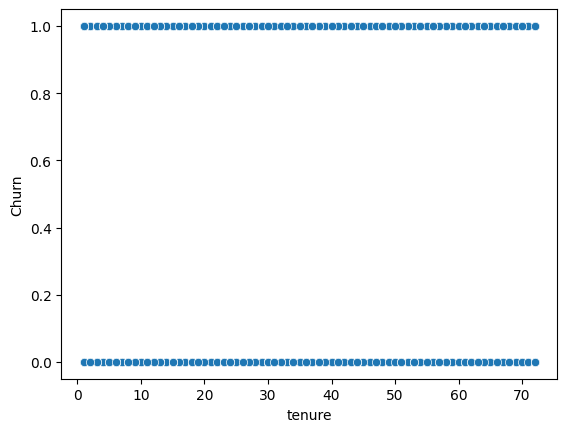

In [18]:
# Examining the relationship between various features and the target variable

sns.scatterplot(x='tenure', y='Churn', data=data)

<Axes: xlabel='MonthlyCharges', ylabel='Churn'>

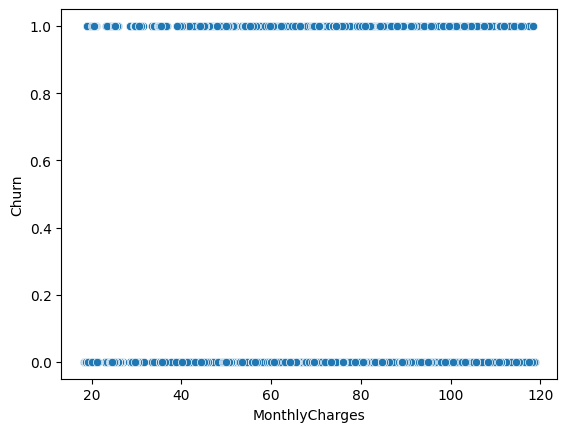

In [19]:
sns.scatterplot(x='MonthlyCharges', y='Churn', data=data)

<Axes: xlabel='TotalCharges', ylabel='Churn'>

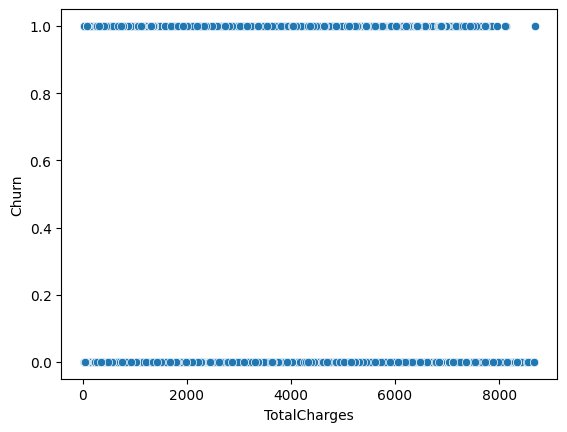

In [20]:
sns.scatterplot(x='TotalCharges', y='Churn', data=data)

**Inferences**

1) The assumption of linearity does not hold well, as evident from the scatter plots, where no clear linear relationship between the features and the target variable is observed.

2) It is because our target variable `Churn` is categorical, that we cannot see any linearity.

## **Checking the Assumption of No Multicollinearity**

**Insights**

1) We will plot the correlation matrix to determine whether there are any features that are highly correlated.

2) Features that are highly correlated let's say ( > 0.75 ) show multicollinearity.

3) If there are any as such, it is better to remove them sinch they affect the model

Text(0.5, 1.0, 'Correlation Matrix')

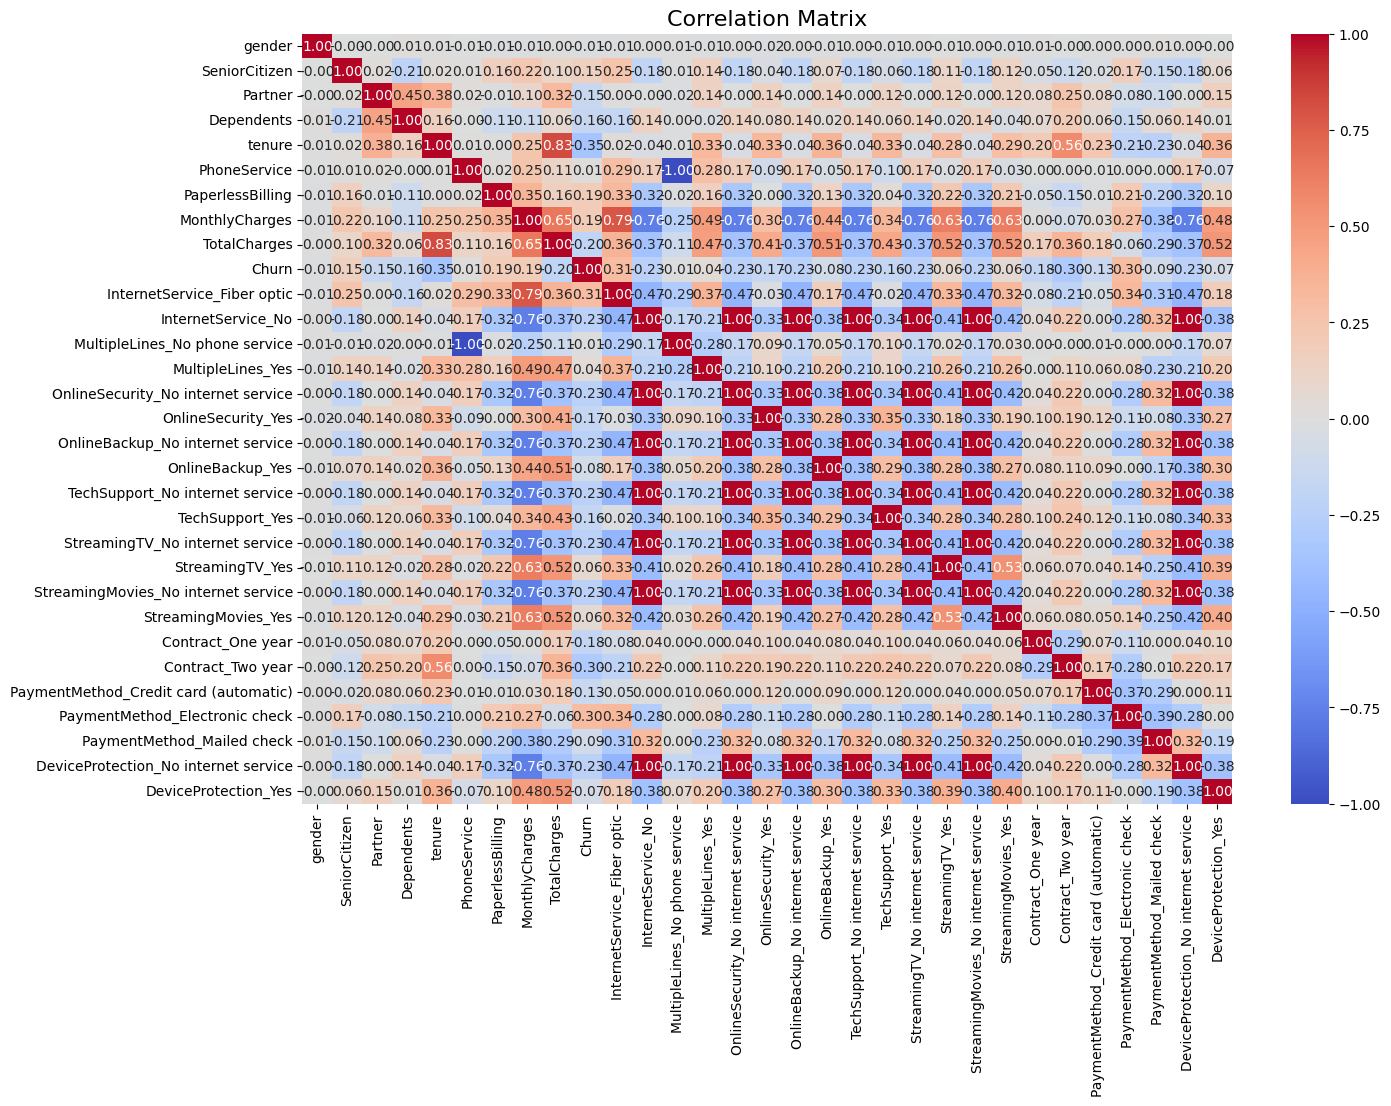

In [21]:
# Plotting the correlation matrix

corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)


**Insights**

1) As we analyze the collinearity matrix, we see high collinearity between

     1) TotalCharges and Tenure (correlation=0.83)
     2) MonthlyCharges and InternetService_Fiber optic `(correlation = 0.79)
     3) PhoneService and MultipleLine_No Phone Service (corelation = -1)
     4) We see that MonthlyCharges has a high negative correlation with every other feature.
  
2) We will drop features that are highly correlated as such `MonthlyCharges`, `InternetService_Fiber optic` and `InternetService_Fiber optic` from the data to remove multicollinearity.






In [22]:
# Dropping the columns of high collinearity
data.drop(columns=['MonthlyCharges', 'MultipleLines_No phone service', 'InternetService_Fiber optic'], axis=1,inplace=True)

In [23]:
# Let's split the data into traning and test sets

X=data.drop(columns=['Churn'])
y=data['Churn']

cols=X.columns
X=np.asarray(X)
y=np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**We will make a statsmodel summary of linear regression for target variable ('Churn) based on the features**

In [24]:
# Let's use the Ordinary Least Square (OLS) from Statsmodel

X=sm.add_constant(X_train,prepend=False)
model=sm.OLS(y_train,X)
result=model.fit()

coefs = result.params
error = result.bse
names = list(cols) + ['intercept']

In [25]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     100.6
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        04:05:36   Log-Likelihood:                -2486.2
No. Observations:                5625   AIC:                             5016.
Df Residuals:                    5603   BIC:                             5162.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0047      0.010     -0.470      0.6

# **Interpretation of Coefficients**

**Inferfences**

1) Each coefficient shows how a one-unit increase in a feature changes the chance of `Churn`.

2) Positive numbers mean a higher chance of `Churn` as the feature increases, and negative numbers mean a lower chance.

3) The intercept value of 0.425 shows the chance of `Churn `when all the features are made 0.


# **R-Square**

**Inferences**

1) The model accounts for only 27.4% of the variation in the target variable `Churn`, which is relatively low.

2) This means that Linear Regression is not capturing a significant portion of the variability in churn.



# **From these interpretations, we can clearly see that the assumption of linearity is not met.**

In [26]:
# Now let us fit the regression model

linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)
y_pred=linear_regression.predict(X_test)

print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.38532570299554025


**Inferences**

1) The RMSE of 0.385 indicates that the predictions deviate from the actual values by an average of 0.385.

2) It is obviously not good because we are doing prediction of binary outcomes.

# **Checking the Assumption of Homoscedasticity**

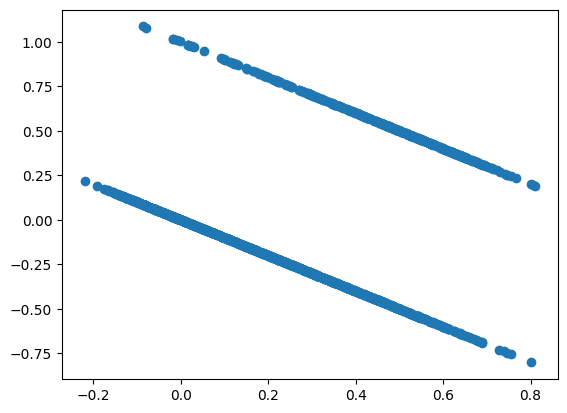

In [27]:
# Plotting a scatterplot

plt.scatter(y_pred, y_test-y_pred)

**Inferences**

1) From the plot, it is evident that the residuals are not spread uniformly around the predicted values.

2) Instead, there appear to be two distinct lines or clusters, suggesting a systematic pattern in the residuals.

3) So, we can conclude that the assumption of homoscedasticity does not hold.

# **Checking the Assumption of Independence**

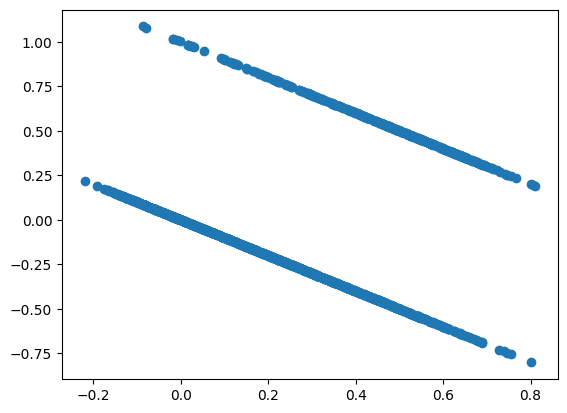

In [28]:
# Plotting a scatterplot of residuals

plt.scatter(y_pred, y_test-y_pred)

**Inferences**

1) From the above plot, we see a clear pattern with two distinct lines which seggests there is some pattern or correlation shown by residuals.

2) We can say that the assumption of independence does not hold as the residuals are not scattered randomly.

# **Checking the Assumption of Normality**

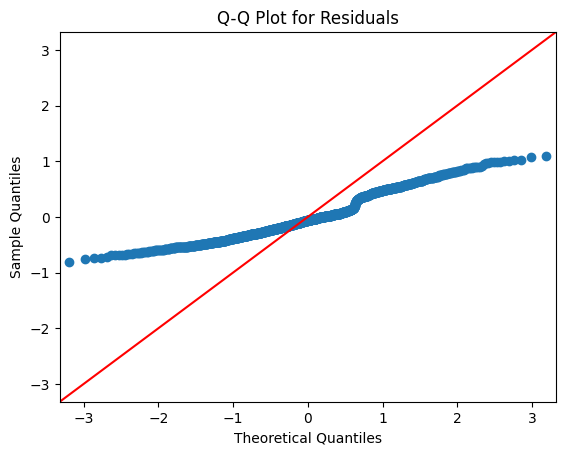

In [29]:
# Plotting a  Q-Q plot
residuals = y_test - y_pred
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot for Residuals")
plt.show()

**Inferences**

1) We observe that residuals deviate from the line at the tails (both ends of the plot)

2) This indicates that the distribution of residuals is not perfectly normal which infers that the assumption of normality dies not hold.

# **Assumptions for Logistic Regression**

1) **Binary Outcome Variable:** The dependent variable (target) must be binary. `Churn` is a categorical variable, so this assumption is satisfied.

2) **Absence of Multicollinearity:** The independent variables should not be highly correlated with each other.

3) **Independece of Observations:** Observations in the dataset should be independent of each other.

4) **No Strong Outliers:** Outliers can disproportionately affect the model. We will use Cooks distance to meansure the influence of a data point.

5) **Absence of Perfect Seperation:** There is a chance that the model might assume that no predictor or combination of predictors perfectly separates the target classes.

6) **Large Smple Size:** Logistic regression assumes that the sample size is large enough for reliable estimates.

7) **Linearity of the Logit:** The relationship between the independent variables and the log odds of the dependent variable must be linear.

# **Assumption of Binary Outcome Variable**

In [30]:
data['Churn'].nunique() # Checking whether the target is binary

2

**Inference**:

1) It is clear that the dependent variable (`Churn`) is binary with only two classes 0s and 1s.

# **Assumption of Absence of Multicollinearity**

**Inference:**

1) With the help of correlation matrix, we removed the features which were highly correlated of one another.

# **Assumption of Independence of Observations**

**Inference:**

1) Since each row in the dataframe represents an independent record or a unique customer, we can confirm that this assumption holds true.

# **Assumption of Absence of Perfect Seperation**

<Axes: xlabel='tenure', ylabel='Churn'>

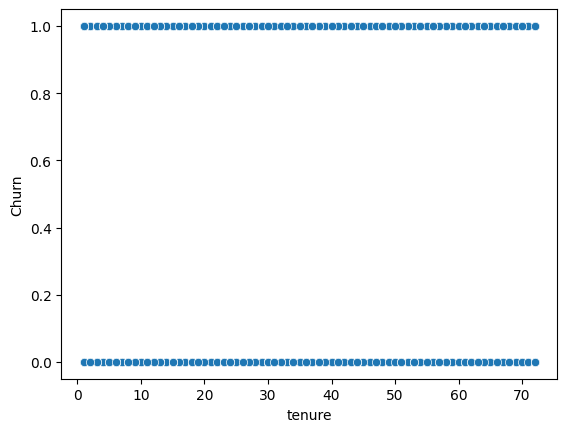

In [31]:
# Plotting Scatterplot for tenure vs Churn
sns.scatterplot(x='tenure', y='Churn', data=data)


<Axes: xlabel='TotalCharges', ylabel='Churn'>

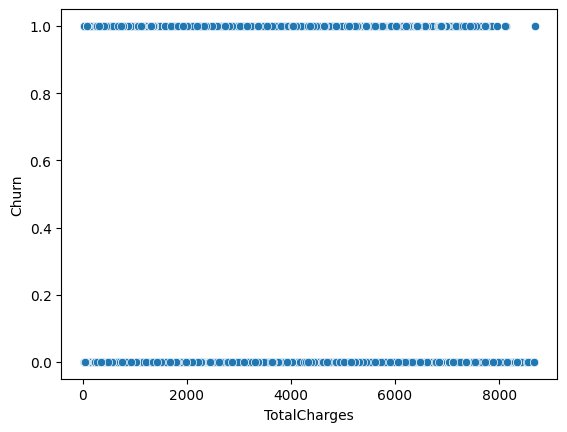

In [32]:
# Plotting Scatterplot for MonthlyCharges vs Churn
sns.scatterplot(x='TotalCharges', y='Churn', data=data)

**Inferences:**

1) From both of the above plots, it is evident that there is no perfect separation between the target variables.

2) Therefore, this assumption holds true.

# **Assumption of No Strong Outliers**

In [35]:
# Generalized Linear Model Regression to calculate Cook's distance

X=data.drop(columns=['Churn'])
y=data['Churn']
logit_model = GLM(y, X, family=families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                            GLM   Df Residuals:                     7011
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2944.3
Date:                Thu, 23 Jan 2025   Deviance:                       5888.6
Time:                        04:06:41   Pearson chi2:                 8.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2743
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [36]:
# Usage of Cook Distance

# Calculating influence measures for the logistic regression model
influence = logit_results.get_influence()

# Making a summary dataframe
summ_data = influence.summary_frame()

# Extract only Cook's Distance from the summary DataFrame
diagnosis_data = summ_data.loc[:, ['cooks_d']]

# Adding absolute standardized residuals to the DataFrame
diagnosis_data['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_data['std_resid'] = diagnosis_data['std_resid'].apply(lambda x: np.abs(x))

# Sorting rows by Cook's Distance
diagnosis_data.sort_values("cooks_d", ascending=False)

# Display the top rows
diagnosis_data.head()


,cooks_d,std_resid
0,3.117605e-04,1.255038
1,2.535888e-06,0.219927
2,2.795912e-04,1.192358
3,4.641660e-07,0.137666
4,3.547468e-05,0.655532


In [38]:

# Setting Cook's distance threshold
cook_threshold = 4 / len(data)
print(f"Threshold for Cook Distance = {cook_threshold}")

# Finding the number of observations that exceed Cook's distance threshold
outliers = diagnosis_data[diagnosis_data['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(data)),1)
print(f'Proportion of data points that are highly influential = {prop_outliers}%')

Threshold for Cook Distance = 0.0005688282138794084
Proportion of data points that are highly influential = 3.7%


**Inferences:**

1)
Since only 3.7% of the data points are identified as highly influential, which represents a obviously small proportion, we will retain all observations for the logistic regression analysis.

2) Therefore, we can say that this assumption has been satisfied.



# **Assumption of Large Sample Size**

Inferences

1) With around 2000 points for (`Churn`='yes') and 5000 points for (`Churn`='no'), we can conclude that the data size is large enough for this assumption to hold true.


# **Modelling Logistic Regression**

In [40]:
# Instantaiating LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)  # Fitting the model

y_pred = log_reg.predict(X_test) # Prediction on the test set
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)  # Calculating accuracy
roc_auc = roc_auc_score(y_test, y_pred_prob)  # Calculating ROC-AUC score
conf_matrix = confusion_matrix(y_test, y_pred)  # Computing confusion matrix
class_report = classification_report(y_test, y_pred) # Printing the classification report

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.79
ROC-AUC: 0.83
Confusion Matrix:
[[914 119]
 [171 203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407



In [41]:
# Creating a DataFrame to summarize the coefficients and their corresponding odds ratios. This is used to interpret the coefficents.

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0],
    'Odds Ratio': np.exp(log_reg.coef_[0])
})
print(coefficients)

                                  Feature  Coefficient  Odds Ratio
0                                  gender    -0.033218    0.967327
1                           SeniorCitizen     0.312165    1.366381
2                                 Partner     0.063339    1.065388
3                              Dependents    -0.237012    0.788982
4                                  tenure    -0.075627    0.927162
5                            PhoneService    -0.273993    0.760338
6                        PaperlessBilling     0.327682    1.387747
7                            TotalCharges     0.000530    1.000530
8                      InternetService_No    -0.155035    0.856385
9                       MultipleLines_Yes     0.265348    1.303885
10     OnlineSecurity_No internet service    -0.155035    0.856385
11                     OnlineSecurity_Yes    -0.540268    0.582592
12       OnlineBackup_No internet service    -0.155035    0.856385
13                       OnlineBackup_Yes    -0.162582    0.84

# **Coefficients Interpretation**



| **Feature**                              | **Coefficient** | **Odds Ratio** | **Interpretation**                                                                 |
|------------------------------------------|-----------------|----------------|------------------------------------------------------------------------------------|
| Gender                                   | -0.033218       | 0.967237       | Being of the coded gender reduces the odds of churn by ~3.3%.                     |
| SeniorCitizen                            | 0.311165        | 1.366381       | Being a senior citizen increases the odds of churn by ~36.6%.                     |
| Partner                                  | 0.063339        | 1.065429       | Having a partner slightly increases the odds of churn by ~6.5%.                   |
| Dependents                               | -0.237012       | 0.788582       | Having dependents reduces the odds of churn by ~21.1%.                            |
| Tenure                                   | -0.070782       | 0.931662       | Each additional month of tenure reduces the odds of churn by ~6.8%.               |
| PhoneService                             | -0.275993       | 0.758338       | Having phone service reduces the odds of churn by ~24.2%.                         |
| PaperlessBilling                         | 0.327628        | 1.387747       | Using paperless billing increases the odds of churn by ~38.8%.                    |
| TotalCharges                             | 0.005630        | 1.005630       | Each additional dollar in total charges increases the odds of churn by ~0.56%.    |
| Internet Service (No internet service)   | -0.155033       | 0.856385       | Not having internet service reduces the odds of churn by ~14.4%.                  |
| MultipleLines (Yes)                      | 0.265348        | 1.303835       | Having multiple lines increases the odds of churn by ~30.4%.                      |
| OnlineSecurity (No internet service)     | -0.155033       | 0.856385       | Not having internet service reduces the odds of churn by ~14.4%.                  |
| OnlineSecurity (No)                      | -0.540285       | 0.582529       | Not having online security reduces the odds of churn by ~41.7%.                   |
| OnlineBackup (No internet service)       | -0.155033       | 0.856385       | Not having internet service reduces the odds of churn by ~14.4%.                  |
| OnlineBackup (No)                        | -0.162585       | 0.849497       | Not having online backup reduces the odds of churn by ~15.1%.                     |
| TechSupport (No internet service)        | -0.155033       | 0.856385       | Not having internet service reduces the odds of churn by ~14.4%.                  |
| TechSupport (No)                         | -0.534311       | 0.586138       | Not having tech support reduces the odds of churn by ~41.4%.                      |
| StreamingTV (No internet service)        | -0.155033       | 0.856385       | Not having internet service reduces the odds of churn by ~14.4%.                  |
| StreamingTV (Yes)                        | 0.225155        | 1.252455       | Streaming TV increases the odds of churn by ~25.2%.                               |
| StreamingMovies (No internet service)    | -0.155033       | 0.856385       | Not having internet service reduces the odds of churn by ~14.4%.                  |
| StreamingMovies (Yes)                    | 0.247517        | 1.280884       | Streaming movies increases the odds of churn by ~28.1%.                           |
| Contract (One year)                      | -0.823429       | 0.438494       | Having a one-year contract reduces the odds of churn by ~56.2%.                   |
| Contract (Two year)                      | -1.444070       | 0.245497       | Having a two-year contract significantly reduces the odds of churn by ~75.5%.     |
| PaymentMethod (Credit card (automatic))  | 0.133260        | 1.142489       | Paying by automatic credit card slightly increases the odds of churn by ~14.2%.   |
| PaymentMethod (Electronic check)         | 0.350813        | 1.351693       | Paying via electronic check increases the odds of churn by ~35.2%.                |
| PaymentMethod (Mailed check)             | -0.141510       | 0.868040       | Paying via mailed check reduces the odds of churn by ~13.2%.                      |
| DeviceProtection (No internet service)   | -0.155033       | 0.856385       | Not having internet service reduces the odds of churn by ~14.4%.                  |
| DeviceProtection (Yes)                   | -0.032860       | 0.967674       | Having device protection slightly reduces the odds of churn by ~3.2%.             |


**Insights**

1) **Key Drivers of Churn:** Senior citizens, paperless billing, electronic checks, and higher total charges are related to high churn.

2) **Features Reduce Churn:** Having dependents, longer tenure, one/two-year contracts, and phone service are related to low churn.

3) **Actions:** We can try retaining senior citizens and customers using electronic checks or paperless billing with better customer support. We can also push customers toward longer-term contracts as these reduce churn significantly.

# **Metrics Interpretation**

In [43]:
print("Classification Report",class_report)

Classification Report               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407



**Insights**

1) The model achieves an accuracy of 79% with an ROC-AUC of 0.83, proving that the model generally does well on classifying churn versus non-churn customers.

2) On Class 0, it is able to give good performance, where precision is 84%, with recall at 88%. For Class 1 (Churn), the precision goes low at about 63%, while the recall was a little over 54%, hence poorly correctly identifying the churned customers.

3) The confusion matrix highlights 171 false negatives, meaning many churned customers are misclassified as non-churners.

4) To improve, we can focus on addressing class imbalance and increasing recall for churn predictions.

# **Assumption of Linearity of the Logit**

In [44]:
# Predicting probabilities and computing log odds
probs = log_reg.predict_proba(X)[:, 1]
log_odds = np.log(probs / (1 - probs))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


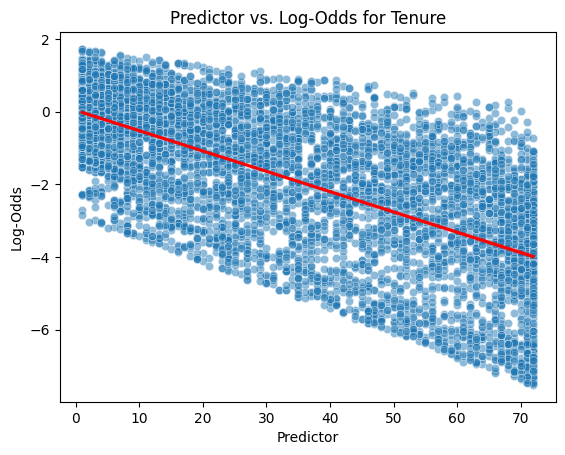

In [55]:
predictor1 = X['tenure']

# With the help of scatter plot and regression, we are checking the linearity

sns.scatterplot(x=predictor1, y=log_odds, alpha=0.5)
sns.regplot(x=predictor1, y=log_odds, scatter=False, color='red')
plt.xlabel('Predictor')
plt.ylabel('Log-Odds')
plt.title('Predictor vs. Log-Odds for Tenure')
plt.show()

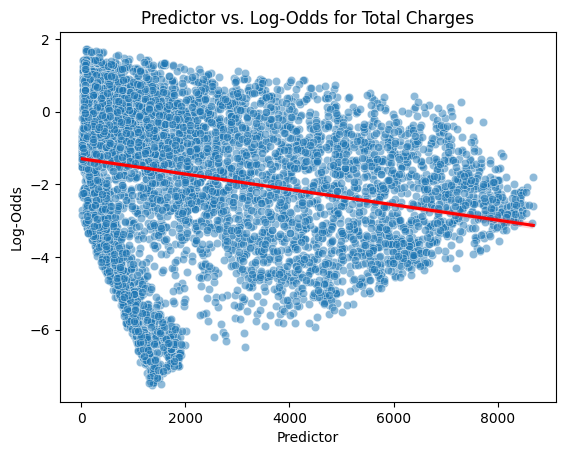

In [54]:
predictor2 = X['TotalCharges']

# With the help of scatter plot and regression, we are checking the linearity

sns.scatterplot(x=predictor2, y=log_odds, alpha=0.5)
sns.regplot(x=predictor2, y=log_odds, scatter=False, color='red')
plt.xlabel('Predictor')
plt.ylabel('Log-Odds')
plt.title('Predictor vs. Log-Odds for Total Charges')
plt.show()

**Inferences**

1) Both the plots show a clear negative relationship, whereby we can conclude that the relationship between the independent variables and the log odds of the dependent variable are linear.

2) Therefore, we can conclude that the assumption of linearity of the logit holds true.



# **Generalized Additive Model (GAM)**

# **Assumptions for GAM**

1) **Independence of Observations** - We did already check that since each row in the dataframe represents an independent record or a unique customer, we can confirm that this assumption holds true.

2) **No Multicollinearity** - We did remove the features which were highly correlated of one another.

3) **Homoscedasticity** -  We did witness Homoscedasticity which is basically constant variance.

4) **Large Sample Size:** With around 2000 points for (`Churn`='yes') and 5000 points for (`Churn`='no'), we did conclude that the data size is large enough for this assumption to hold true.

# **GAM Modelling**

In [58]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a spline function for each feature in the dataset
gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23),
                   n_splines=20, lam=0.6)

# Finding best smoothing parameters for each spline term
gam.gridsearch(X_train_scaled, y_train)

# Fitting the model
gam.fit(X_train_scaled, y_train)

100% (11 of 11) |########################| Elapsed Time: 0:00:47 Time:  0:00:47


LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + intercept,
   tol=0.0001, verbose=False)

In [59]:
# Making predictions
y_pred_prob_gam = gam.predict_proba(X_test_scaled)

threshold = 0.4
y_pred_gam = (y_pred_prob_gam > threshold).astype(int)

# Calculation of various metrics
accuracy = accuracy_score(y_test, y_pred_gam)
precision = precision_score(y_test, y_pred_gam)
recall = recall_score(y_test, y_pred_gam)
f1 = f1_score(y_test, y_pred_gam)
auc = roc_auc_score(y_test, y_pred_prob_gam)  # Use probabilities for AUC-ROC

# Printing evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

# Printing the Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gam))

Accuracy: 0.7676
Precision: 0.5548
Recall: 0.6364
F1 Score: 0.5928
AUC-ROC: 0.8340

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407



# **Interpretation of Metrics**

1) The model gives an accuracy of 76.76% with an AUC-ROC of 0.8340, showing generally good performance.

2) Performance for Class 0 (No Churn) is good, where the precision is 86%, and recall is 82%, hence the model reliably identifies non-churners. While for Class 1 (Churn), precision is 55%, whereas recall is 64%, thus it struggles to predict correctly the actual churn cases.

3) The weighted average F1-score of 0.77 reflects a moderate balance between precision and recall across both classes.

4) For improving the churn predictions, the model could be enhanced by techniques such as handling class imbalance or exploring alternative algorithms.

In [60]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     52.7798
Link Function:                        LogitLink Log Likelihood:                                 -2257.7318
Number of Samples:                         5625 AIC:                                             4621.0232
                                                AICc:                                             4622.081
                                                UBRE:                                                2.829
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3068
Feature Function                  Lam

<ipython-input-60-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


# **Interpretation of GAM Model**



**Insights**

1) This GAM model uses a binomial distribution with a logit link and has a pseudo R-squared value of 0.2933, hence accounting for about 29% of the variance of the target variable.

2) The key features s(4), s(10), s(11), and s(12) are highly significant at the p-value of less than 0.001, hence showing that they contribute much to the model.

3) Some of the features are insignificant, like s(0), s(1), and s(2), with a p-value greater than 0.05, probably not contributing much to the prediction.




# **Model Comparision**





**Linear Regression:**

1) The linear regression model accounted for only 27.4% of the variation in the target variable Churn, which is relatively low.

2) This means that Linear Regression is not capturing a significant portion of the variability in churn.

3) Though linear regression is not recommended in binary classification tasks as such in this case, it is easy to implement and interpretable.

**Logistic Regression**

1)
Logistic regression calculates odds ratios that provide clear insights into how each feature influences the probability of an outcome, making it a highly interpretable choice for binary classification tasks.

2) The logistic regression model achieved an accuracy of 79% with an ROC-AUC of 0.83, proving that the model generally does well on classifying churn versus non-churn customers.

3) We could see that we have obtained petty good results.

**Generalized Additive Models (GAM)**

1) GAMs excel at modeling non-linear relationships by using splines, enabling each feature to influence the target variable.

2) However, while they provide detailed insights into these non-linear effects, GAMs are more complex compared to simpler models like linear or logistic regression.

3) The GAM Model gave an accuracy of 76.76% with an AUC-ROC of 0.8340, showing generally good performance.

# **Recommendation**

# **Logistic Regression**

1) Logistic regression yielded e best accuracy and ROC-AUC score performances, making this model very applicable to several analyses of customer churn.

2) It's simple to interpret, as it displays which features are the most important, and how that impacts the odds of churning.

3) The model's clear-cut results, such as coefficients and odds ratios, help to spot those key factors that drive churn.

4) In case if capturing non-linear relationships is required, tuning the GAM model might be worthwhile to give a shot.